# Overview: Medicare Spending + Demographics

## Objective:
Analyze how Medicare spending on chronic conditions varies across U.S. counties and explore its relationship with demographics such as income, race, and age.

Please do the following:

Download 2014-2022 Medicare Variation Public Use File.csv (https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-geographic-comparisons/medicare-geographic-variation-by-national-state-county)

Download 2022 CHR CSV Analytic Data (https://www.countyhealthrankings.org/health-data/methodology-and-sources/data-documentation/national-data-documentation-2010-2023)

In [2]:
!pip install polars

In [3]:
import polars as pl

In [4]:
# Load and Preview the Two Files
# Load Medicare data
df_medicare = pl.read_csv(r'J:\Python\Learning\Data\2014-2022 Medicare Variation Public Use File.csv')

# Load demographic data
df_demo = pl.read_csv(r'J:\Python\Learning\Data\analytic_data2022.csv')

In [5]:
df_medicare.head(50)

YEAR,BENE_GEO_LVL,BENE_GEO_DESC,BENE_GEO_CD,BENE_AGE_LVL,BENES_TOTAL_CNT,BENES_WTH_PTAPTB_CNT,BENES_FFS_CNT,BENES_MA_CNT,MA_PRTCPTN_RATE,BENE_AVG_AGE,BENE_FEML_PCT,BENE_MALE_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_OTHR_PCT,BENE_DUAL_PCT,BENE_AVG_RISK_SCRE,TOT_MDCR_PYMT_AMT,TOT_MDCR_STDZD_PYMT_AMT,TOT_MDCR_PYMT_PC,TOT_MDCR_STDZD_PYMT_PC,IP_MDCR_PYMT_AMT,IP_MDCR_PYMT_PCT,IP_MDCR_PYMT_PC,IP_MDCR_PYMT_PER_USER,IP_MDCR_STDZD_PYMT_AMT,IP_MDCR_STDZD_PYMT_PCT,IP_MDCR_STDZD_PYMT_PC,IP_MDCR_STDZD_PYMT_PER_USER,BENES_IP_CVRD_STAY_CNT,BENES_IP_PCT,IP_CVRD_STAYS_PER_1000_BENES,IP_CVRD_DAYS_PER_1000_BENES,ACUTE_HOSP_READMSN_CNT,ACUTE_HOSP_READMSN_PCT,…,TRTMNTS_MDCR_PYMT_AMT,TRTMNTS_MDCR_PYMT_PCT,TRTMNTS_MDCR_PYMT_PC,TRTMNTS_MDCR_PYMT_PER_USER,TRTMNTS_MDCR_STDZD_PYMT_AMT,TRTMNTS_MDCR_STDZD_PYMT_PCT,TRTMNTS_MDCR_STDZD_PYMT_PC,TRTMNTS_MDCR_STDZD_PYMT_PER_USER,BENES_TRTMNTS_CNT,BENES_TRTMNTS_PCT,TRTMNTS_EVNTS_PER_1000_BENES,PTB_OTHR_SRVCS_MDCR_PYMT_AMT,PTB_OTHR_SRVCS_MDCR_STDZD_PYMT,TOT_PBPMT_RDCTN_AMT,TOT_PBPMT_RDCTN_PCC,PQI03_DBTS_AGE_LT_65,PQI03_DBTS_AGE_65_74,PQI03_DBTS_AGE_GE_75,PQI05_COPD_ASTHMA_AGE_40_64,PQI05_COPD_ASTHMA_AGE_65_74,PQI05_COPD_ASTHMA_AGE_GE_75,PQI07_HYPRTNSN_AGE_LT_65,PQI07_HYPRTNSN_AGE_65_74,PQI07_HYPRTNSN_AGE_GE_75,PQI08_CHF_AGE_LT_65,PQI08_CHF_AGE_65_74,PQI08_CHF_AGE_GE_75,PQI11_BCTRL_PNA_AGE_LT_65,PQI11_BCTRL_PNA_AGE_65_74,PQI11_BCTRL_PNA_AGE_GE_75,PQI12_UTI_AGE_LT_65,PQI12_UTI_AGE_65_74,PQI12_UTI_AGE_GE_75,PQI15_ASTHMA_AGE_LT_40,PQI16_LWRXTRMTY_AMPUTN_AGE_LT_65,PQI16_LWRXTRMTY_AMPUTN_AGE_65_74,PQI16_LWRXTRMTY_AMPUTN_AGE_GE_75
i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2014,"""National""","""National""",null,"""All""","""56767775""","""49302821""","""33462969""","""15839852""","""0.3213""","""71""","""0.5505""","""0.4495""","""0.7993""","""0.0971""","""0.0584""","""0.0452""","""0.2148""","""1""","""326832715419.43""","""307544792474.81""","""9767""","""9190.6""","""108470702415.23""","""0.3319""","""3241.51""","""18525.95""","""87686002024.77""","""0.2851""","""2620.39""","""14976.09""","""5855068""","""0.175""","""281.6952""","""1523.5539""","""1562184""","""0.1808""",…,"""16576407938.12""","""0.0507""","""495.37""","""884.03""","""16018719784.89""","""0.0521""","""478.7""","""854.29""","""18750863""","""0.5603""","""2836.7589""","""4633851279.60""","""4686840101.78""","""NA""","""NA""","""735""","""203""","""223""","""1568""","""806""","""1104""","""131""","""77""","""166""","""1043""","""729""","""2160""","""686""","""499""","""1373""","""361""","""269""","""1120""","""286""","""147""","""50""","""47"""
2014,"""National""","""National""",null,"""<65""","""9286837""","""7824336""","""5867170""","""1957166""","""0.2501""","""51""","""0.4769""","""0.5231""","""0.6725""","""0.1978""","""0.0885""","""0.0412""","""0.5736""","""1.14""","""62967436000.82""","""59132868028.33""","""10732.16""","""10078.6""","""23664203769.83""","""0.3758""","""4033.33""","""22186.64""","""19275865722.86""","""0.326""","""3285.38""","""18072.3""","""1066597""","""0.1818""","""342.6015""","""2097.9874""","""405723""","""0.2269""",…,"""2732617171.05""","""0.0434""","""465.75""","""1100.09""","""2688108873.50""","""0.0455""","""458.16""","""1082.17""","""2484005""","""0.4234""","""2575.1633""","""608464952.83""","""619193046.58""","""NA""","""NA""","""735""","""NA""","""NA""","""1568""","""NA""","""NA""","""131""","""NA""","""NA""","""1043""","""NA""","""NA""","""686""","""NA""","""NA""","""361""","""NA""","""NA""","""286""","""147""","""NA""","""NA"""
2014,"""National""","""National""",null,""">=65""","""47480938""","""41478485""","""27595799""","""13882686""","""0.3347""","""76""","""0.5661""","""0.4339""","""0.8263""","""0.0757""","""0.052""","""0.0461""","""0

In [6]:
df_demo.head(5)

State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed),Premature death (AIAN),Premature death CI low (AIAN),Premature death CI high (AIAN),Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Asian/Pacific Islander),Premature death CI low (Asian/Pacific Islander),Premature death CI high (Asian/Pacific Islander),Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Black),Premature death CI low (Black),Premature death CI high (Black),Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (Hispanic),Premature death CI low (Hispanic),Premature death CI high (Hispanic),Premature death flag (Hispanic) (. = No Flag/1=Unreliable/2=Suppressed),Premature death (White),Premature death CI low (White),Premature death CI high (White),Premature death flag (White) (. = No Flag/1=Unreliable/2=Suppressed),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,…,% American Indian & Alaska Native CI low,% American Indian & Alaska Native CI high,% Asian raw value,% Asian numerator,% Asian denominator,% Asian CI low,% Asian CI high,% Native Hawaiian/Other Pacific Islander raw value,% Native Hawaiian/Other Pacific Islander numerator,% Native Hawaiian/Other Pacific Islander denominator,% Native Hawaiian/Other Pacific Islander CI low,% Native Hawaiian/Other Pacific Islander CI high,% Hispanic raw value,% Hispanic numerator,% Hispanic denominator,% Hispanic CI low,% Hispanic CI high,% non-Hispanic white raw value,% non-Hispanic white numerator,% non-Hispanic white denominator,% non-Hispanic white CI low,% non-Hispanic white CI high,% not proficient in English raw value,% not proficient in English numerator,% not proficient in English denominator,% not proficient in English CI low,% not proficient in English CI high,% female raw value,% female numerator,% female denominator,% female CI low,% female CI high,% rural raw value,% rural numerator,% rural denominator,% rural CI low,% rural CI high
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""statecode""","""countycode""","""fipscode""","""state""","""county""","""year""","""county_ranked""","""v001_rawvalue""","""v001_numerator""","""v001_denominator""","""v001_cilow""","""v001_cihigh""","""v001_flag""","""v001_race_aian""","""v001_race_aian_cilow""","""v001_race_aian_cihigh""","""v001_race_aian_flag""","""v001_race_asian""","""v001_race_asian_cilow""","""v001_race_asian_cihigh""","""v001_race_asian_flag""","""v001_race_black""","""v001_race_black_cilow""","""v001_race_black_cihigh""","""v001_race_black_flag""","""v001_race_hispanic""","""v001_race_hispanic_cilow""","""v001_race_hispanic_cihigh""","""v001_race_hispanic_flag""","""v001_race_white""","""v001_race_white_cilow""","""v001_race_white_cihigh""","""v001_race_white_flag""","""v002_rawvalue""","""v002_numerator""","""v002_denominator""","""v002_cilow""",…,"""v055_cilow""","""v055_cihigh""","""v081_rawvalue""","""v081_numerator""","""v081_denominator""","""v081_cilow""","""v081_cihigh""","""v080_rawvalue""","""v080_numerator""","""v080_denominator""","""v080_cilow""","""v080_cihigh""","""v056_rawvalue""","""v056_numerator""","""v056_denominator""","""v056_cilow""","""v056_cihigh""","""v126_rawvalue""","""v126_numerator""","""v126_denominator""","""v126_cilow""","""v126_cihigh""","""v059_rawvalue""","""v059_numerator""","""v059_denominator""","""v059_cilow""","""v059_cihigh""","""v057_ra

In [12]:
# Let’s check if the dataset has county/state info
print(df_medicare.columns)

['YEAR', 'BENE_GEO_LVL', 'BENE_GEO_DESC', 'BENE_GEO_CD', 'BENE_AGE_LVL', 'BENES_TOTAL_CNT', 'BENES_WTH_PTAPTB_CNT', 'BENES_FFS_CNT', 'BENES_MA_CNT', 'MA_PRTCPTN_RATE', 'BENE_AVG_AGE', 'BENE_FEML_PCT', 'BENE_MALE_PCT', 'BENE_RACE_WHT_PCT', 'BENE_RACE_BLACK_PCT', 'BENE_RACE_HSPNC_PCT', 'BENE_RACE_OTHR_PCT', 'BENE_DUAL_PCT', 'BENE_AVG_RISK_SCRE', 'TOT_MDCR_PYMT_AMT', 'TOT_MDCR_STDZD_PYMT_AMT', 'TOT_MDCR_PYMT_PC', 'TOT_MDCR_STDZD_PYMT_PC', 'IP_MDCR_PYMT_AMT', 'IP_MDCR_PYMT_PCT', 'IP_MDCR_PYMT_PC', 'IP_MDCR_PYMT_PER_USER', 'IP_MDCR_STDZD_PYMT_AMT', 'IP_MDCR_STDZD_PYMT_PCT', 'IP_MDCR_STDZD_PYMT_PC', 'IP_MDCR_STDZD_PYMT_PER_USER', 'BENES_IP_CVRD_STAY_CNT', 'BENES_IP_PCT', 'IP_CVRD_STAYS_PER_1000_BENES', 'IP_CVRD_DAYS_PER_1000_BENES', 'ACUTE_HOSP_READMSN_CNT', 'ACUTE_HOSP_READMSN_PCT', 'BENES_ER_VISITS_CNT', 'ER_VISITS_PER_1000_BENES', 'BENES_ER_VISITS_PCT', 'OP_MDCR_PYMT_AMT', 'OP_MDCR_PYMT_PCT', 'OP_MDCR_PYMT_PC', 'OP_MDCR_PYMT_PER_USER', 'OP_MDCR_STDZD_PYMT_AMT', 'OP_MDCR_STDZD_PYMT_PCT', '

In [7]:
# Filter to 2022 and county-level data only
df_medicare_2022 = df_medicare.filter(
    (pl.col("YEAR") == 2022) & (pl.col("BENE_GEO_LVL") == "County")
)

In [8]:
df_medicare_2022.select(["BENE_GEO_CD", "BENE_GEO_DESC"]).head(5)

BENE_GEO_CD,BENE_GEO_DESC
i64,str
2013,"""AK-Aleutians East"""
2016,"""AK-Aleutians West"""
2020,"""AK-Anchorage"""
2050,"""AK-Bethel"""
2060,"""AK-Bristol Bay"""


In [18]:
df_medicare_2022_vars = df_medicare_2022.select([
    pl.col("BENE_GEO_CD").cast(pl.Utf8).str.zfill(5).alias("FIPS"),
    pl.col("YEAR"),
    pl.col("BENE_GEO_DESC"),
    pl.col("BENES_TOTAL_CNT"),
    pl.col("TOT_MDCR_PYMT_AMT"),
    pl.col("TOT_MDCR_PYMT_PC"), # Per capita Medicare cost
    pl.col("ACUTE_HOSP_READMSN_PCT") # Hospital readmission rate
])

In [12]:
print(df_demo.columns)

['State FIPS Code', 'County FIPS Code', '5-digit FIPS Code', 'State Abbreviation', 'Name', 'Release Year', 'County Ranked (Yes=1/No=0)', 'Premature death raw value', 'Premature death numerator', 'Premature death denominator', 'Premature death CI low', 'Premature death CI high', 'Premature death flag (0 = No Flag/1=Unreliable/2=Suppressed)', 'Premature death (AIAN)', 'Premature death CI low (AIAN)', 'Premature death CI high (AIAN)', 'Premature death flag (AIAN) (. = No Flag/1=Unreliable/2=Suppressed)', 'Premature death (Asian/Pacific Islander)', 'Premature death CI low (Asian/Pacific Islander)', 'Premature death CI high (Asian/Pacific Islander)', 'Premature death flag (Asian/Pacific Islander) (. = No Flag/1=Unreliable/2=Suppressed)', 'Premature death (Black)', 'Premature death CI low (Black)', 'Premature death CI high (Black)', 'Premature death flag (Black) (. = No Flag/1=Unreliable/2=Suppressed)', 'Premature death (Hispanic)', 'Premature death CI low (Hispanic)', 'Premature death CI hi

In [15]:
df_demo_2022_vars = df_demo.select([
    pl.col("5-digit FIPS Code").alias("FIPS"),
    pl.col("% 65 and older raw value").alias("pct_65_plus"),
    pl.col("Median household income raw value").alias("median_income"),
    pl.col("Children in poverty raw value").alias("pct_child_poverty"),
    pl.col("% non-Hispanic Black raw value").alias("pct_black"),
    pl.col("% Hispanic raw value").alias("pct_hispanic"),
    pl.col("% rural raw value").alias("pct_rural"),
    pl.col("Uninsured raw value").alias("pct_uninsured"),
    pl.col("Ratio of population to primary care physicians.").alias("pcp_ratio"),
    pl.col("Adult obesity raw value").alias("pct_obese"),
    pl.col("Physical inactivity raw value").alias("pct_inactive"),
    pl.col("Air pollution - particulate matter raw value").alias("air_pollution_pm"),
    pl.col("Income inequality raw value").alias("income_inequality"),
    pl.col("Life expectancy raw value").alias("life_expectancy")
])

In [19]:
df_merged_medicare_demo_2022 = df_medicare_2022_vars.join(df_demo_2022_vars, on="FIPS", how="inner")

In [20]:
df_merged_medicare_demo_2022.head(5)

FIPS,YEAR,BENE_GEO_DESC,BENES_TOTAL_CNT,TOT_MDCR_PYMT_AMT,TOT_MDCR_PYMT_PC,ACUTE_HOSP_READMSN_PCT,pct_65_plus,median_income,pct_child_poverty,pct_black,pct_hispanic,pct_rural,pct_uninsured,pcp_ratio,pct_obese,pct_inactive,air_pollution_pm,income_inequality,life_expectancy
str,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""02013""",2022,"""AK-Aleutians East""","""171""","""1415298.69""","""11322.39""","""*""","""0.1099676566""","""79128""","""0.132""","""0.0885033814""","""0.1487797707""","""1""","""0.2328951803""",null,"""0.315""","""0.281""",null,"""4.0392079208""","""112.50385595"""
"""02016""",2022,"""AK-Aleutians West""","""256""","""931165.65""","""6466.43""","""*""","""0.0776408451""","""92216""","""0.06""","""0.0647887324""","""0.1371478873""","""1""","""0.1769415532""","""2817""","""0.277""","""0.238""",null,"""2.5822378855""","""91.47865596"""
"""02020""",2022,"""AK-Anchorage""","""44493""","""386170849.24""","""10593.08""","""0.1627""","""0.1223079468""","""84577""","""0.09""","""0.0522614466""","""0.0953691287""","""0.0411717942""","""0.1114271977""","""849.55752212""","""0.307""","""0.205""","""5.4""","""3.8403610001""","""78.683915473"""
"""02050""",2022,"""AK-Bethel""","""1697""","""13941072.67""","""10213.24""","""0.0921""","""0.0819005261""","""52214""","""0.368""","""0.0094917828""","""0.0213158323""","""0.7393757715""","""0.1675077522""","""919.3""","""0.383""","""0.326""",null,"""5.7727385255""","""70.711690412"""
"""02060""",2022,"""AK-Bristol Bay""","""170""","""1342878.95""","""10917.72""","""0""","""0.192893401""","""87032""","""0.118""","""0.0063451777""","""0.0837563452""","""1""","""0.1512481645""","""-836""","""0.341""","""0.216""",null,"""3.4074074074""",null


In [22]:
df_merged_medicare_demo_2022.write_csv("df_merged_medicare_demo_2022.csv")

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("df_merged_medicare_demo_2022.csv")

In [32]:
# df_filtered = df.dropna(subset=["TOT_MDCR_PYMT_PC", "ACUTE_HOSP_READMSN_PCT", "pct_65_plus"])
# df_filled = df[selected_cols].fillna(df[selected_cols].median())
# still want to use those rows with missing
print(df.columns)
vars_needed = list(df.columns)

Index(['FIPS', 'YEAR', 'BENE_GEO_DESC', 'BENES_TOTAL_CNT', 'TOT_MDCR_PYMT_AMT',
       'TOT_MDCR_PYMT_PC', 'ACUTE_HOSP_READMSN_PCT', 'pct_65_plus',
       'median_income', 'pct_child_poverty', 'pct_black', 'pct_hispanic',
       'pct_rural', 'pct_uninsured', 'pcp_ratio', 'pct_obese', 'pct_inactive',
       'air_pollution_pm', 'income_inequality', 'life_expectancy'],
      dtype='object')


In [33]:
# count missing for each col
missing_counts = df[vars_needed].isna().sum().sort_values(ascending=False)

In [34]:
missing_counts

pcp_ratio                 153
life_expectancy            70
air_pollution_pm           26
pct_rural                   7
income_inequality           6
pct_uninsured               1
median_income               1
pct_child_poverty           1
pct_hispanic                0
pct_inactive                0
pct_obese                   0
FIPS                        0
YEAR                        0
pct_65_plus                 0
ACUTE_HOSP_READMSN_PCT      0
TOT_MDCR_PYMT_PC            0
TOT_MDCR_PYMT_AMT           0
BENES_TOTAL_CNT             0
BENE_GEO_DESC               0
pct_black                   0
dtype: int64

In [38]:
missing_pct = 100*df[vars_needed].isna().mean().sort_values(ascending=False)
missing_pct

pcp_ratio                 4.806786
life_expectancy           2.199183
air_pollution_pm          0.816839
pct_rural                 0.219918
income_inequality         0.188501
pct_uninsured             0.031417
median_income             0.031417
pct_child_poverty         0.031417
pct_hispanic              0.000000
pct_inactive              0.000000
pct_obese                 0.000000
FIPS                      0.000000
YEAR                      0.000000
pct_65_plus               0.000000
ACUTE_HOSP_READMSN_PCT    0.000000
TOT_MDCR_PYMT_PC          0.000000
TOT_MDCR_PYMT_AMT         0.000000
BENES_TOTAL_CNT           0.000000
BENE_GEO_DESC             0.000000
pct_black                 0.000000
dtype: float64

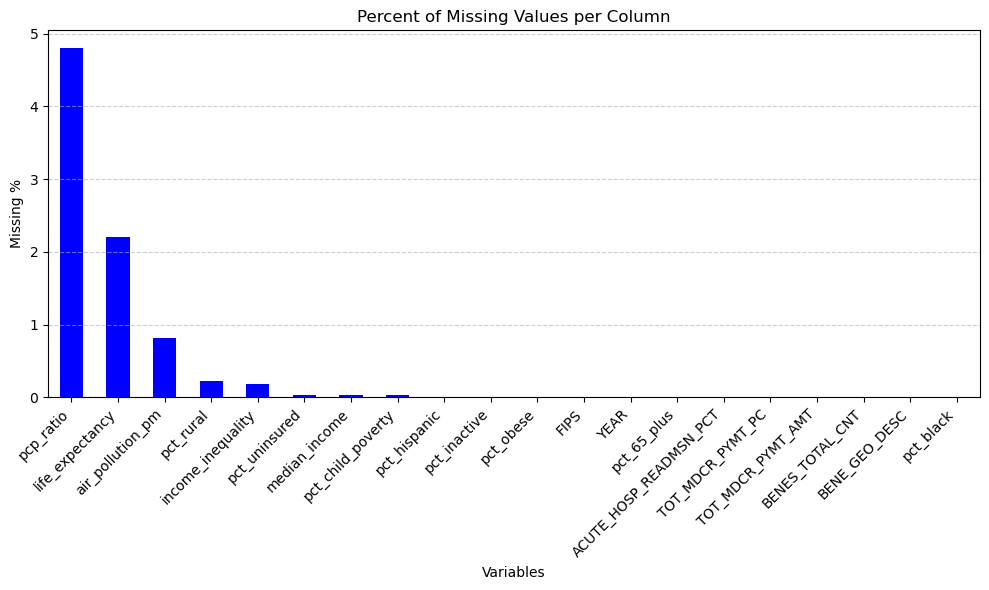

In [46]:
plt.figure(figsize=(10,6))
missing_pct.plot(kind='bar', color='b')
plt.title("Percent of Missing Values per Column")
plt.xlabel("Variables")
plt.ylabel("Missing %")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)    #optional. alpha=0.6 is opacity
plt.savefig(r"J:\Python\Learning\A1 Medicare Spending Demographics\Output\missing_pct_bar_chart.png", dpi=300)  # or .pdf, .svg, etc.
plt.show()

## Top 10 Counties by Medicare Spending per Capita

In [66]:
# pandas
import pandas as pd
df = pd.read_csv("df_merged_medicare_demo_2022.csv")

df_MDCR_PYMT_PC_sorted = df[["FIPS", "BENE_GEO_DESC", "BENES_TOTAL_CNT", "TOT_MDCR_PYMT_PC"]].sort_values("TOT_MDCR_PYMT_PC", ascending=False).head(10)
df_MDCR_PYMT_PC_sorted

,FIPS,BENE_GEO_DESC,BENES_TOTAL_CNT,TOT_MDCR_PYMT_PC
440,13109,GA-Evans,2299,9998.74
2712,48319,TX-Mason,1438,9994.38
1268,26051,MI-Gladwin,8822,9994.07
911,20035,KS-Cowley,7847,9993.66
650,19193,IA-Woodbury,20053,9992.79
2703,48295,TX-Lipscomb,659,9991.06
1312,26139,MI-Ottawa,58502,9990.92
85,1113,AL-Russell,12347,9989.54
1255,26025,MI-Calhoun,32339,9986.48
1307,26129,MI-Ogemaw,7396,9984


In [68]:
df_MDCR_PYMT_PC_sorted.to_excel(r"J:/Python/Learning/A1 Medicare Spending Demographics/Output/top10_MDCR_PYMT_PC_pd.xlsx", index=False)

In [60]:
# polars
df = pl.read_csv("df_merged_medicare_demo_2022.csv")

df_MDCR_PYMT_PC_sorted_top10 = df.select(["FIPS", "BENE_GEO_DESC", "BENES_TOTAL_CNT", "TOT_MDCR_PYMT_PC"]).sort("TOT_MDCR_PYMT_PC", descending=True).head(10)
df_MDCR_PYMT_PC_sorted_top10

FIPS,BENE_GEO_DESC,BENES_TOTAL_CNT,TOT_MDCR_PYMT_PC
i64,str,str,str
13109,"""GA-Evans""","""2299""","""9998.74"""
48319,"""TX-Mason""","""1438""","""9994.38"""
26051,"""MI-Gladwin""","""8822""","""9994.07"""
20035,"""KS-Cowley""","""7847""","""9993.66"""
19193,"""IA-Woodbury""","""20053""","""9992.79"""
48295,"""TX-Lipscomb""","""659""","""9991.06"""
26139,"""MI-Ottawa""","""58502""","""9990.92"""
1113,"""AL-Russell""","""12347""","""9989.54"""
26025,"""MI-Calhoun""","""32339""","""9986.48"""


In [61]:
df_MDCR_PYMT_sorted_top10.write_csv(r"J:/Python/Learning/A1 Medicare Spending Demographics/Output/top10_MDCR_PYMT_PC.csv")

## Scatter Plot of Median Income vs. Medicare Spending per

In [75]:
df.dtypes
df["TOT_MDCR_PYMT_PC"] = pd.to_numeric(df["TOT_MDCR_PYMT_PC"], errors="coerce")
df.dtypes

FIPS                        int64
YEAR                        int64
BENE_GEO_DESC              object
BENES_TOTAL_CNT            object
TOT_MDCR_PYMT_AMT          object
TOT_MDCR_PYMT_PC          float64
ACUTE_HOSP_READMSN_PCT     object
pct_65_plus               float64
median_income             float64
pct_child_poverty         float64
pct_black                 float64
pct_hispanic              float64
pct_rural                 float64
pct_uninsured             float64
pcp_ratio                 float64
pct_obese                 float64
pct_inactive              float64
air_pollution_pm          float64
income_inequality         float64
life_expectancy           float64
dtype: object

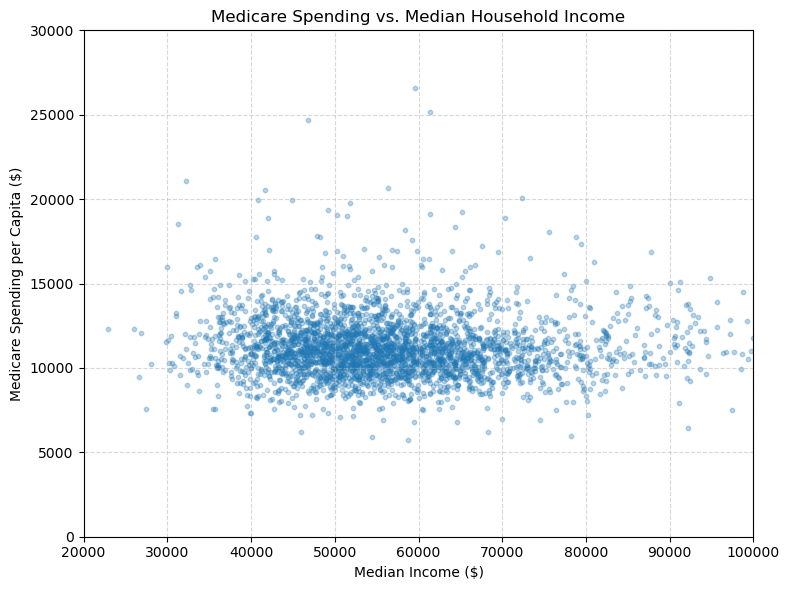

In [76]:
# Step 1: Set up the figure
plt.figure(figsize=(8, 6))  # width=8, height=6 inches

# Step 2: Make the scatter plot
plt.scatter(
    df["median_income"],
    df["TOT_MDCR_PYMT_PC"],
    alpha=0.3,  # transparency so overlapping dots are visible
    s=10  # makes the markers smaller. Default is usually s=36.
)

# Step 3: Add labels and title
plt.title("Medicare Spending vs. Median Household Income")
plt.xlabel("Median Income ($)")
plt.ylabel("Medicare Spending per Capita ($)")
plt.grid(True, linestyle="--", alpha=0.5)  # subtle grid lines
#Limit X and/or Y axes (zoom in to main range)
plt.xlim(20000, 100000)
plt.ylim(0, 30000)

# Step 4: Show the plot
plt.tight_layout()
plt.show()

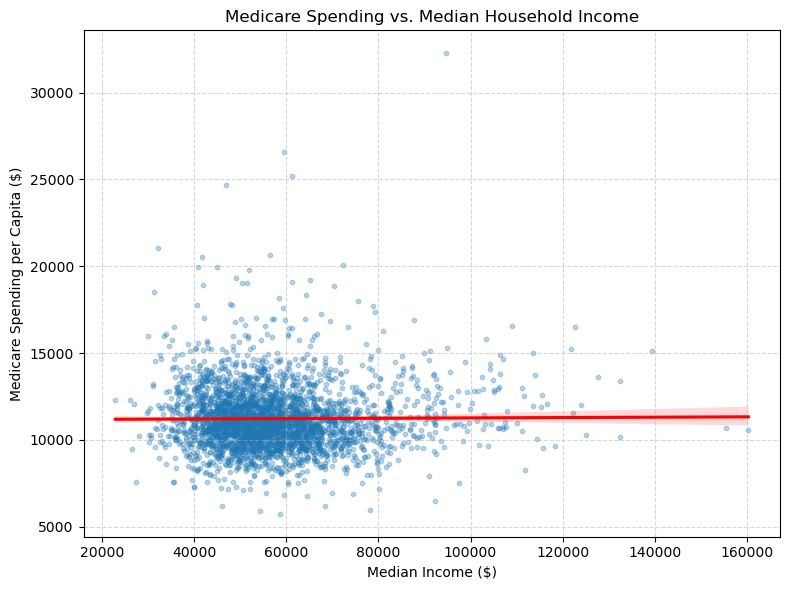

In [77]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(
    data=df, 
    x="median_income", 
    y="TOT_MDCR_PYMT_PC",
    scatter_kws={"alpha": 0.3, "s": 10},
    line_kws={"color": "red"}
)
plt.title("Medicare Spending vs. Median Household Income")
plt.xlabel("Median Income ($)")
plt.ylabel("Medicare Spending per Capita ($)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

## Map — visualize spending geographically

In [78]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---- ----------------------------------- 1.8/16.2 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 4.2/16.2 MB 10.5 MB/s eta 0:00:02
   ---------------- ----------------------- 6.6/16.2 MB 10.9 MB/s eta 0:00:01
   --------------------- ------------------ 8.7/16.2 MB 10.7 MB/s eta 0:00:01
   -------------------------- ------------- 10.7/16.2 MB 10.7 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 10.8 MB/s eta 0:00:01
   -------------------------------------- - 15.5/16.2 MB 10.9 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 10.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ----------- ---------------------------- 1.8/6.3 MB 9.2 MB/s eta 0:00:01
   -------------------------- ------------- 4.2/6.3 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 10.7 MB/s eta 0:00:00
   

In [79]:
import geopandas as gpd

# Read U.S. counties from Census TIGER data (GeoJSON format)
counties = gpd.read_file("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json")

In [82]:
print(counties.columns)
counties.head()

Index(['id', 'GEO_ID', 'STATE', 'COUNTY', 'NAME', 'LSAD', 'CENSUSAREA',
       'geometry'],
      dtype='object')


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.7179 32.4028..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.5778 33.76532, -86.75914 33.8406..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87052, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.5817, -88.13925 34.5878..."


In [87]:
# Ensure FIPS is 5-digit string in both datasets
df["FIPS"] = df["FIPS"].astype(str).str.zfill(5)
geo_df = counties.merge(df, how="left", left_on="id", right_on="FIPS")
geo_df_conus = geo_df[~geo_df["STATE"].isin(["02", "15", "72"])] 

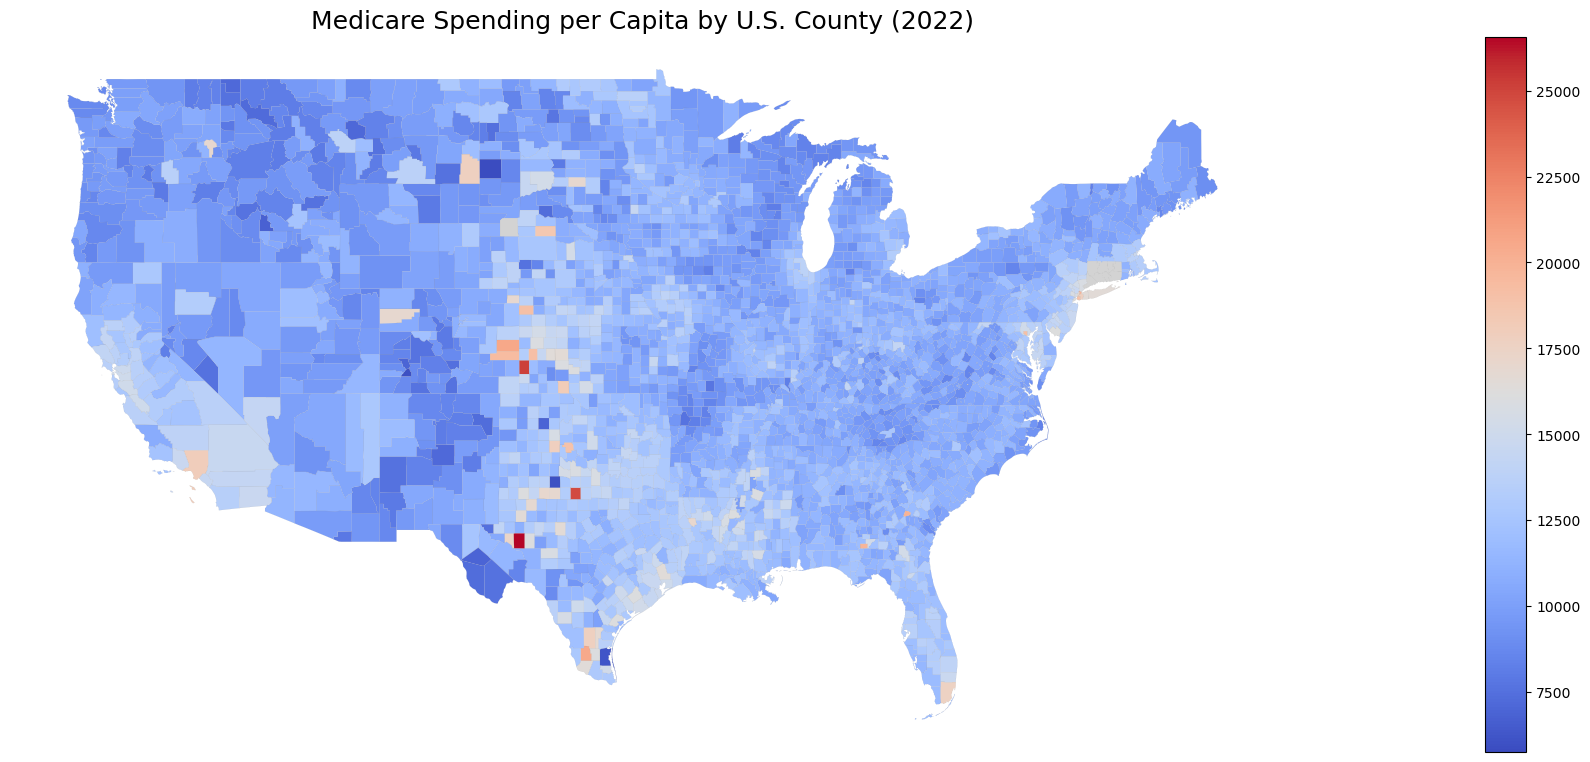

In [90]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Step 1: Set up the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))  # Larger figure for clarity

# Step 2: Create a divider for shrinking the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.1)  # Adjust width and spacing

# Step 3: Plot the map
geo_df_conus.plot(
    column="TOT_MDCR_PYMT_PC",     # Column to visualize
    cmap="coolwarm",               # Color palette
    linewidth=0.05,                # Thinner borders
    edgecolor="gray",              # Border color
    ax=ax,                         # Main plot axis
    legend=True,                   # Show color legend
    cax=cax,                       # Attach the legend to a smaller axis
    missing_kwds={                 # Style for missing data
        "color": "lightgray",
        "label": "No Data"
    }
)

# Step 4: Title and cleanup
ax.set_title("Medicare Spending per Capita by U.S. County (2022)", fontsize=18)
ax.axis("off")
plt.tight_layout()
plt.show()

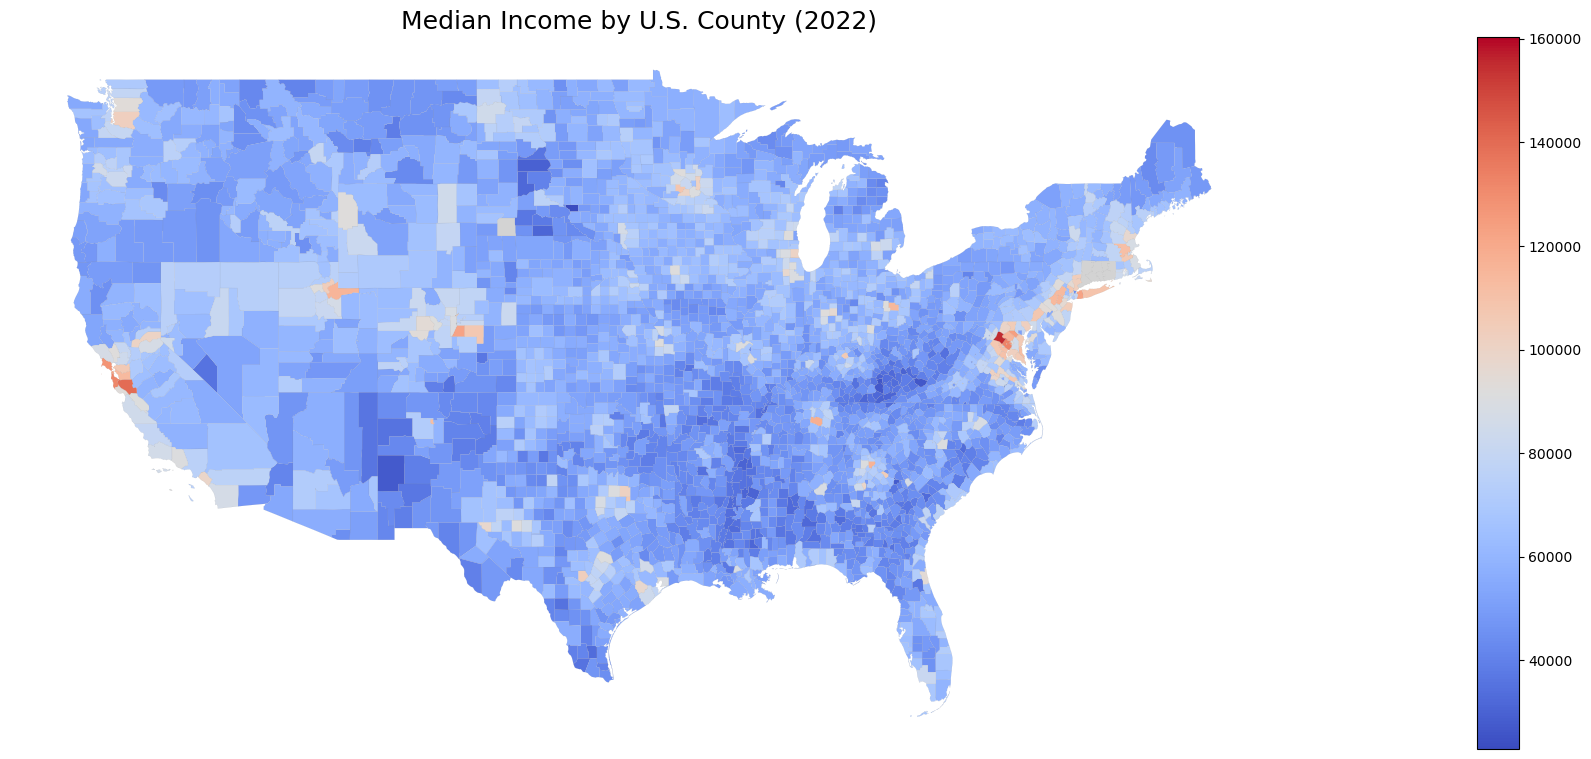

In [91]:
# Step 1: Set up the figure and axis
fig, ax = plt.subplots(figsize=(18, 10))  # Larger figure for clarity

# Step 2: Create a divider for shrinking the colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2.5%", pad=0.1)  # Adjust width and spacing

# Step 3: Plot the map
geo_df_conus.plot(
    column="median_income",     # Column to visualize
    cmap="coolwarm",               # Color palette
    linewidth=0.05,                # Thinner borders
    edgecolor="gray",              # Border color
    ax=ax,                         # Main plot axis
    legend=True,                   # Show color legend
    cax=cax,                       # Attach the legend to a smaller axis
    missing_kwds={                 # Style for missing data
        "color": "lightgray",
        "label": "No Data"
    }
)

# Step 4: Title and cleanup
ax.set_title("Median Income by U.S. County (2022)", fontsize=18)
ax.axis("off")
plt.tight_layout()
plt.show()

## Segment analysis — low-income vs high-income counties

In [92]:
q1 = df["median_income"].quantile(0.25)
q2 = df["median_income"].quantile(0.50)
q3 = df["median_income"].quantile(0.75)

def label_quartile(x):
    if x < q1:
        return "q1"
    elif x < q2:
        return "q2"
    elif x < q3:
        return "q3"
    else:
        return "q4"

df["income_quartile"]=df["median_income"].apply(label_quartile)

In [93]:
df.head(5)

,FIPS,YEAR,BENE_GEO_DESC,BENES_TOTAL_CNT,TOT_MDCR_PYMT_AMT,TOT_MDCR_PYMT_PC,ACUTE_HOSP_READMSN_PCT,pct_65_plus,median_income,pct_child_poverty,...,pct_hispanic,pct_rural,pct_uninsured,pcp_ratio,pct_obese,pct_inactive,air_pollution_pm,income_inequality,life_expectancy,income_quartile
0,02013,2022,AK-Aleutians East,171,1415298.69,11322.39,*,0.109968,79128.0,0.132,...,0.148780,1.000000,0.232895,NaN,0.315,0.281,NaN,4.039208,112.503856,q4
1,02016,2022,AK-Aleutians West,256,931165.65,6466.43,*,0.077641,92216.0,0.060,...,0.137148,1.000000,0.176942,2817.000000,0.277,0.238,NaN,2.582238,91.478656,q4
2,02020,2022,AK-Anchorage,44493,386170849.24,10593.08,0.1627,0.122308,84577.0,0.090,...,0.095369,0.041172,0.111427,849.557522,0.307,0.205,5.4,3.840361,78.683915,q4
3,02050,2022,AK-Bethel,1697,13941072.67,10213.24,0.0921,0.081901,52214.0,0.368,...,0.021316,0.739376,0.167508,919.300000,0.383,0.326,NaN,5.772739,70.711690,q2
4,02060,2022,AK-Bristol Bay,170,1342878.95,10917.72,0,0.192893,87032.0,0.118,...,0.083756,1.000000,0.151248,-836.000000,0.341,0.216,NaN,3.407407,NaN,q4


In [95]:
import numpy as np

conditions = [
    df["median_income"] > 100000
]

flags = ['Y']

df['high_income'] = np.select(conditions, flags, default="N")

In [119]:
df.head(100)

,FIPS,YEAR,BENE_GEO_DESC,BENES_TOTAL_CNT,TOT_MDCR_PYMT_AMT,TOT_MDCR_PYMT_PC,ACUTE_HOSP_READMSN_PCT,pct_65_plus,median_income,pct_child_poverty,...,pct_uninsured,pcp_ratio,pct_obese,pct_inactive,air_pollution_pm,income_inequality,life_expectancy,income_quartile,high_income,is_rural
0,02013,2022,AK-Aleutians East,171,1415298.69,11322.39,*,0.109968,79128.0,0.132,...,0.232895,NaN,0.315,0.281,NaN,4.039208,112.503856,q4,N,True
1,02016,2022,AK-Aleutians West,256,931165.65,6466.43,*,0.077641,92216.0,0.060,...,0.176942,2817.000000,0.277,0.238,NaN,2.582238,91.478656,q4,N,True
2,02020,2022,AK-Anchorage,44493,386170849.24,10593.08,0.1627,0.122308,84577.0,0.090,...,0.111427,849.557522,0.307,0.205,5.4,3.840361,78.683915,q4,N,False
3,02050,2022,AK-Bethel,1697,13941072.67,10213.24,0.0921,0.081901,52214.0,0.368,...,0.167508,919.300000,0.383,0.326,NaN,5.772739,70.711690,q2,N,True
4,02060,2022,AK-Bristol Bay,170,1342878.95,10917.72,0,0.192893,87032.0,0.118,...,0.151248,-836.000000,0.341,0.216,NaN,3.407407,NaN,q4,N,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01131,2022,AL-Wilcox,3286,11021182.24,10607.49,0.1478,0.210170,31909.0,0.294,...,0.115752,3457.666667,0.454,0.441,9.0,5.927825,69.845386,q1,N,True
96,01133,2022,AL-Winston,6342,31784376.34,11625.59,0.1786,0.225881,46453.0,0.228,...,0.130418,2953.625000,0.383,0.377,8.8,4.810655,74.823226,q1,N,True
97,05001,2022,AR-Arkansas,4409,30413943.02,10924.55,0.1516,0.204913,51186.0,0.218,...,0.097778,1942.888889,0.368,0.336,8.3,5.749261,72.947023,q2,N,False
98,05003,2022,AR-Ashley,5384,46311160.58,13019.72,0.1665,0.216195,44677.0,0.244,...,0.111918,2457.125000,0.391,0.357,8.1,5.187993,73.814210,q1,N,True


In [98]:
conditions

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 3178    False
 3179    False
 3180    False
 3181    False
 3182    False
 Name: median_income, Length: 3183, dtype: bool]

In [99]:
df.groupby("income_quartile")["TOT_MDCR_PYMT_PC"].mean()

income_quartile
q1    11416.471849
q2    11172.705063
q3    11090.884064
q4    11222.903160
Name: TOT_MDCR_PYMT_PC, dtype: float64

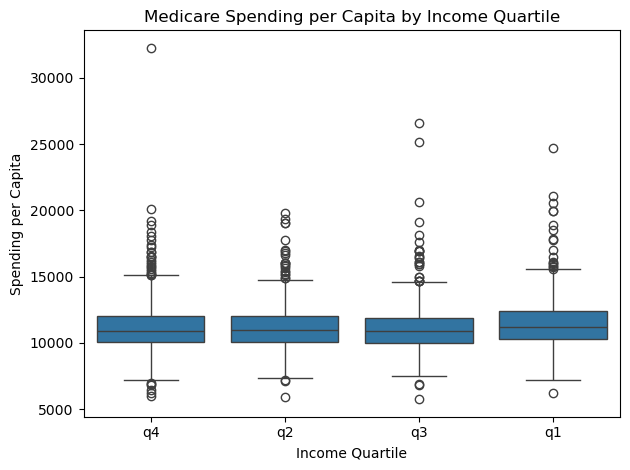

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="income_quartile", y="TOT_MDCR_PYMT_PC")
plt.title("Medicare Spending per Capita by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("Spending per Capita")
plt.tight_layout()
plt.show()

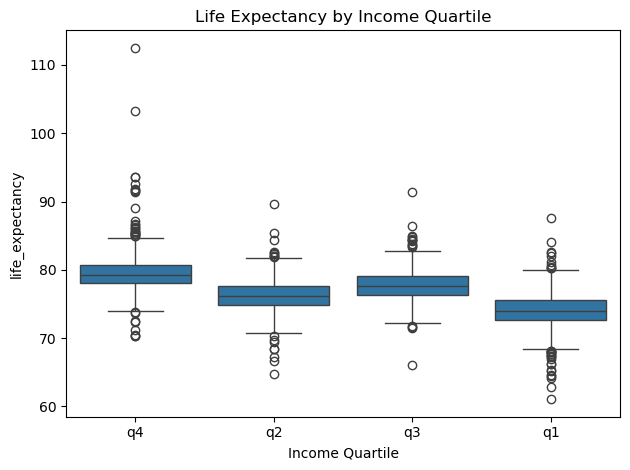

In [101]:
sns.boxplot(data=df, x="income_quartile", y="life_expectancy")
plt.title("Life Expectancy by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("life_expectancy")
plt.tight_layout()
plt.show()

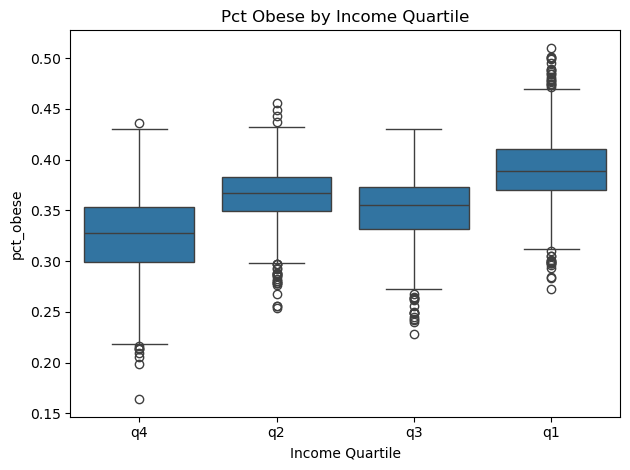

In [103]:
sns.boxplot(data=df, x="income_quartile", y="pct_obese")
plt.title("Pct Obese by Income Quartile")
plt.xlabel("Income Quartile")
plt.ylabel("pct_obese")
plt.tight_layout()
plt.show()

In [104]:
vars_to_plot = [
    "pct_obese",
    "pct_uninsured",
    "pct_rural",
    "pct_child_poverty"
]

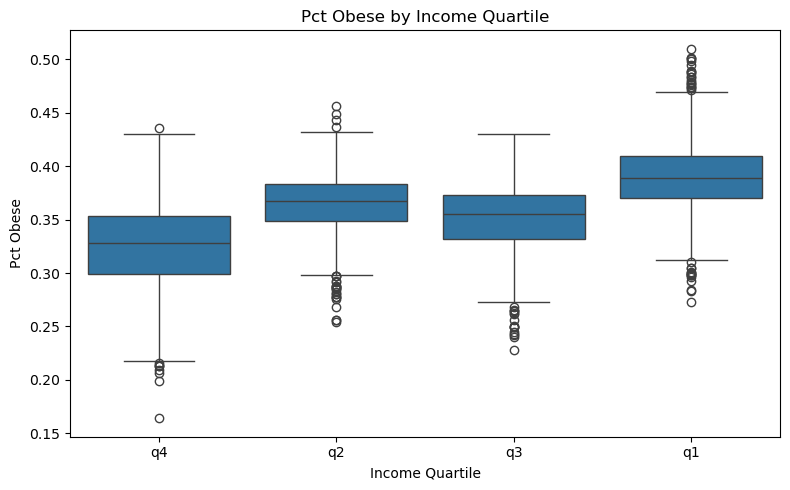

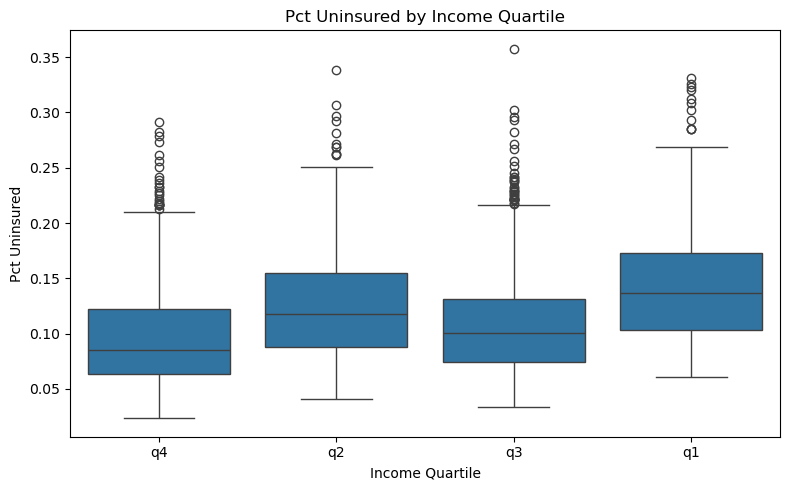

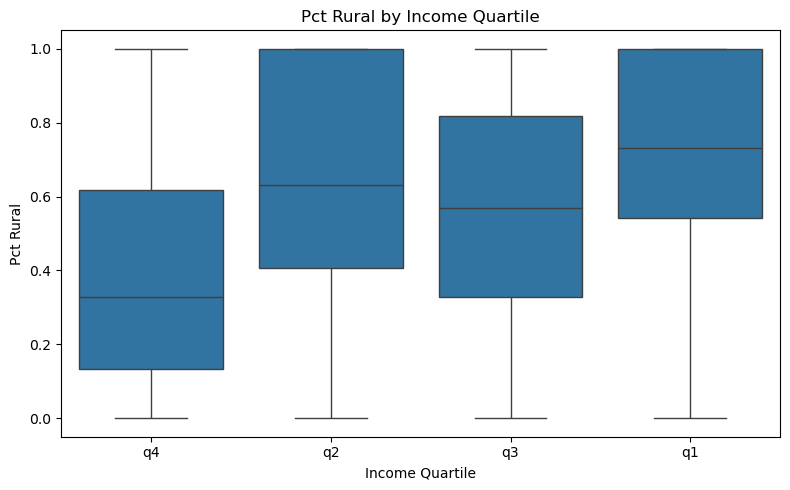

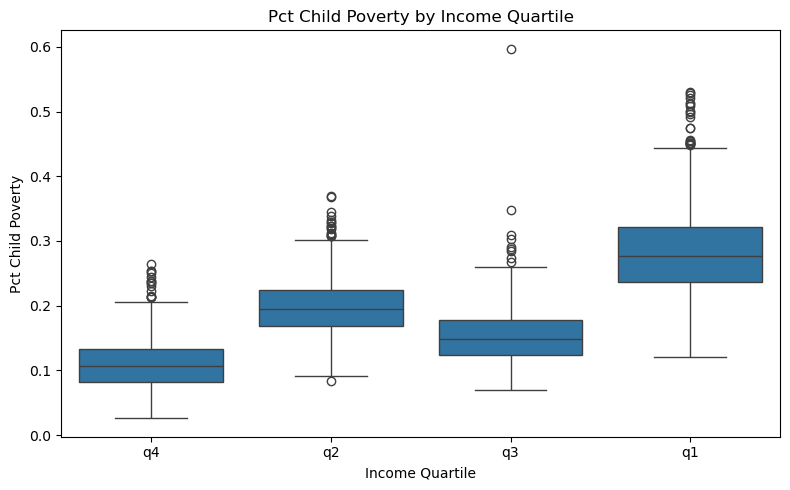

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

for var in vars_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x="income_quartile", y=var)
    plt.title(f"{var.replace('_', ' ').title()} by Income Quartile")
    plt.xlabel("Income Quartile")
    plt.ylabel(var.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()

## Correlation Heatmap

In [109]:
corr_vars = [
    "TOT_MDCR_PYMT_PC",      # Medicare spending per capita
    "median_income",         # Income
    "pct_obese",             # Obesity rate
    "pct_uninsured",         # Uninsured rate
    "pct_rural",             # % of rural residents
    "pct_child_poverty",     # Child poverty rate
    "life_expectancy",        # Life expectancy
    "income_inequality",
    "pct_65_plus",
    "air_pollution_pm"
]

In [110]:
corr_matrix = df[corr_vars].corr()

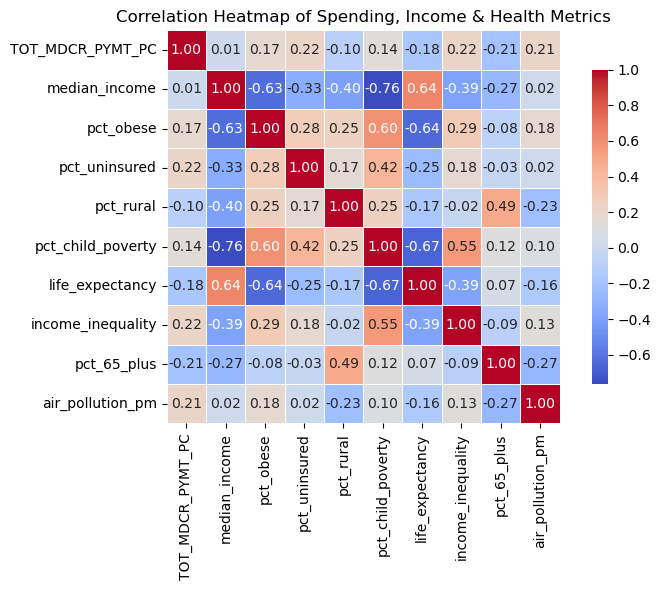

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,         # show correlation numbers
    cmap="coolwarm",    # color scheme
    fmt=".2f",          # format to 2 decimals
    square=True,        # square cells
    linewidths=0.5,     # thin grid lines
    cbar_kws={"shrink": 0.8}  # smaller colorbar
)
plt.title("Correlation Heatmap of Spending, Income & Health Metrics")
plt.tight_layout()
plt.show()

In [113]:
corr_matrix.to_csv(r"J:/Python/Learning/A1 Medicare Spending Demographics/Output/correlation_matrix.csv", index=True)

## Groupby 

In [114]:
group_avg = df.groupby("income_quartile")[
    ["TOT_MDCR_PYMT_PC", "pct_obese", "pct_uninsured", "life_expectancy"]
].mean().round(2)

print(group_avg)

                 TOT_MDCR_PYMT_PC  pct_obese  pct_uninsured  life_expectancy
income_quartile                                                             
q1                       11416.47       0.39           0.14            74.06
q2                       11172.71       0.36           0.13            76.23
q3                       11090.88       0.35           0.11            77.75
q4                       11222.90       0.32           0.10            79.57


In [116]:
df["is_rural"] = df["pct_rural"] > 0.5

df.groupby("is_rural")[
    ["TOT_MDCR_PYMT_PC", "median_income", "life_expectancy"]
].mean().round(2)

,TOT_MDCR_PYMT_PC,median_income,life_expectancy
is_rural,,,
False,11359.49,63547.99,77.59
True,11137.51,53381.98,76.42


In [118]:
group_avg.sort_values("life_expectancy", ascending=False)

,TOT_MDCR_PYMT_PC,pct_obese,pct_uninsured,life_expectancy
income_quartile,,,,
q4,11222.90,0.32,0.10,79.57
q3,11090.88,0.35,0.11,77.75
q2,11172.71,0.36,0.13,76.23
q1,11416.47,0.39,0.14,74.06
